<h1>Análisando algoritmos de ordenamiento</h1>

In [141]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por quicksort</h3>

In [142]:
def quicksort(L, first, last):
    # definimos los índices y calculamos el pivote
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2

    # iteramos hasta que i no sea menor que j
    while i < j:
        # iteramos mientras que el valor de L[i] sea menor que pivote
        while L[i] < pivote:
            # Incrementamos el índice
            i+=1
        # iteramos mientras que el valor de L[j] sea mayor que pivote
        while L[j] > pivote:
            # decrementamos el índice
            j-=1
        # si i es menor o igual que j significa que los índices se han cruzado
        if i <= j:
            # creamos una variable temporal para guardar el valor de L[j]
            x = L[j]
            # intercambiamos los valores de L[j] y L[i]
            L[j] = L[i]
            L[i] = x
            # incrementamos y decrementamos i y j respectivamente
            i+=1
            j-=1

    # si first es menor que j mantenemos la recursividad
    if first < j:
        L = quicksort(L, first, j)
    # si last es mayor que i mantenemos la recursividad
    if last > i:
        L = quicksort(L, i, last)

    # devolvemos la lista ordenada
    return L

In [143]:
B = np.random.permutation(range(0,10))
C = list(B)
print C
quicksort(C,0,len(C)-1)
print C

[6, 2, 0, 3, 9, 4, 1, 8, 5, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al final de cada llamado a la función, los valores en el arreglo anteriores al pivote tienen numeros menores y los siguientes tien numeros mayores.

In [144]:
def invariant(G, piv,first,last):
    L = list(G)
    pivote = piv
    print "Lista", L
    print "Pivote ", pivote
    print "first ", first, "last ",last
    i = first
    j = last
    cont = 0
    while L[i] <= pivote and i < last:
        i+= 1
        cont=cont + 1
    while L[j] >= pivote and j > first:
        j-=1
        cont= cont + 1
        
    lon = last - first + 1
    return (cont - lon) < 2 or (lon - cont < 2)

In [145]:
print invariant([1, 2, 3, 4], 2.5,0,3)
print invariant([1, 2, 3, 1], 2.5,0,3)

Lista [1, 2, 3, 4]
Pivote  2.5
first  0 last  3
True
Lista [1, 2, 3, 1]
Pivote  2.5
first  0 last  3
True


Algoritmo de ordenamiento por merge sort incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [146]:
def right_quicksort(L, first, last):
    original_A = L
    try:
        i = first
        j = last    
        pivote = (L[i] + L[j]) / 2
        while i < j:
            while L[i] < pivote:
                i+=1
            while L[j] > pivote:
                j-=1
            if i <= j:
                x = L[j]
                L[j] = L[i]
                L[i] = x
                i+=1
                j-=1
        
        #res = pivote.fetchone()
        if len(L)>=2: #and res:      
            assert invariant(L,pivote,first,last)
        
        if first < j:       
            L = right_quicksort(L, first, j)
        if last > i:
            L = right_quicksort(L, i, last)
        return L
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "Original A=", original_A
        print "otro", L

In [147]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
C = list(B)
print C
right_quicksort(C,0,len(C)-1)
print C

[5, 4, 6, 3, 7, 2, 8, 1, 9]
Lista [5, 4, 6, 3, 1, 2, 8, 7, 9]
Pivote  7
first  0 last  8
Lista [2, 1, 3, 6, 4, 5, 8, 7, 9]
Pivote  3
first  0 last  5
Lista [1, 2, 3, 6, 4, 5, 8, 7, 9]
Pivote  2
first  0 last  2
Lista [1, 2, 3, 6, 4, 5, 8, 7, 9]
Pivote  2
first  1 last  2
Lista [1, 2, 3, 5, 4, 6, 8, 7, 9]
Pivote  5
first  3 last  5
Lista [1, 2, 3, 4, 5, 6, 8, 7, 9]
Pivote  4
first  3 last  4
Lista [1, 2, 3, 4, 5, 6, 8, 7, 9]
Pivote  5
first  4 last  5
Lista [1, 2, 3, 4, 5, 6, 7, 8, 9]
Pivote  8
first  6 last  8
Lista [1, 2, 3, 4, 5, 6, 7, 8, 9]
Pivote  8
first  7 last  8
[1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [148]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

        
def acct_quicksort(L, first, last, acct):
    i = first;acct.count()
    j = last;acct.count()     
    pivote = (L[i] + L[j]) / 2;acct.count()

    while i < j:
        acct.count()
        while L[i] < pivote:
            acct.count()
            i+=1;acct.count()
        while L[j] > pivote:
            acct.count()
            j-=1;acct.count()
        if i <= j:
            acct.count()
            x = L[j];acct.count()
            L[j] = L[i];acct.count()
            L[i] = x;acct.count()
            i+=1;acct.count()
            j-=1;acct.count()
            
    if first < j:    
        acct.count()
        L = acct_quicksort(L, first, j,acct);acct.count()
    if last > i:
        acct.count()
        L = acct_quicksort(L, i, last,acct);acct.count()
    return L

In [149]:
B = np.random.permutation(range(0,10))
C = list(B)
print C
acct = Counter()
acct_quicksort(C,0,len(C)-1, acct)
acct.print_steps()

[3, 8, 6, 5, 2, 9, 7, 0, 4, 1]
Number of steps = 175


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [150]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i>0 :
            l = range(i)
            rnd.shuffle(l)
            C =list(l)
            acct.reset()
            acct_quicksort(C,0,len(C)-1, acct)
        results.append(acct.steps)
    return results

In [151]:
print exper_analysis(20)

[0, 3, 12, 32, 40, 71, 77, 99, 111, 146, 170, 189, 219, 251, 244, 254, 284, 337, 372, 386]


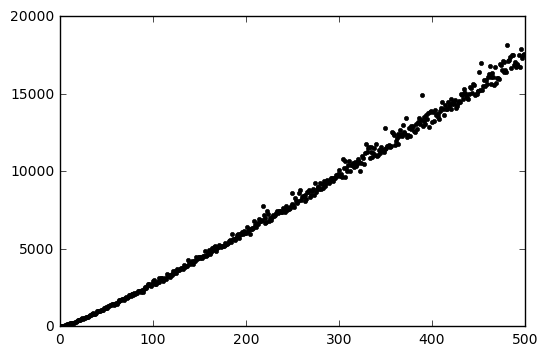

In [152]:
pl.clf()
x = np.arange(500)
y = np.array(exper_analysis(500))
pl.plot(x, y, 'k.')

<p>Tiempo de ejecucion</p>

In [153]:
import random as rnd
import time
def exper_analysis2(n):
    results = []
    for i in range(n):
        tiqui = 0
        if i > 0 :
            l = range(i)
            rnd.shuffle(l)
            C =list(l)
            tic = time.clock()
            quicksort(C,0,len(C)-1)
            toc = time.clock()
            tiqui = (toc-tic)*3000000
        results.append(tiqui)
    return results


In [154]:
print exper_analysis2(10)

[0, 7.945741344883572, 5.959305326541653, 11.918612017325358, 12.911829344375292, 13.905048035667278, 23.837224034650717, 23.837222670408664, 24.830439997458598, 27.810094707092503]


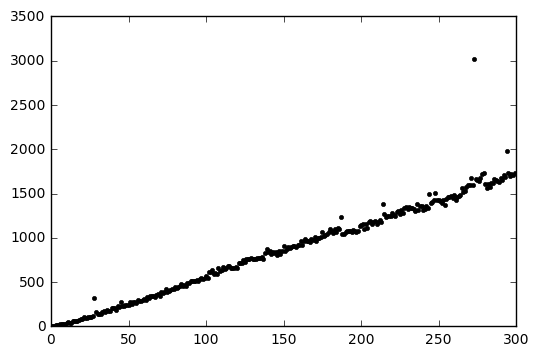

In [165]:
pl.clf()
x = np.arange(300)
y = np.array(exper_analysis2(300))
pl.plot(x, y, 'k.')

<p>Tiempo de teorico</p>

In [156]:
def exper_analysis3(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i > 1:
            l = i * i
        results.append(l)
    return results

In [157]:
print exper_analysis3(20)

[0, 0, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


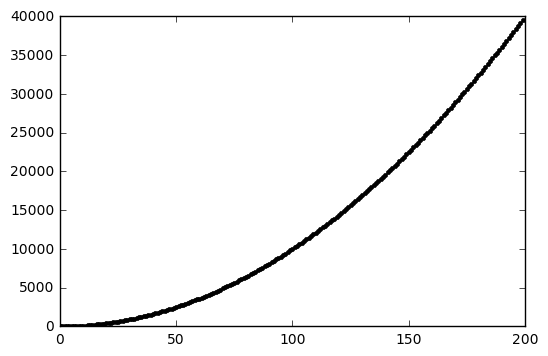

In [158]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis3(200))
pl.plot(x, y, 'k.')

<H2>Numero de operaciones, tiempo de ejecucion y tiempo teórico</H2>

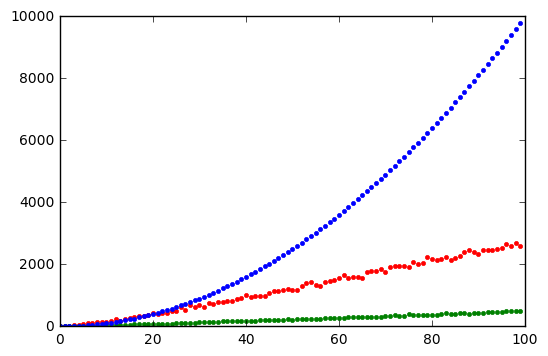

In [159]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.',color='red')  #De color rojo el número de operaciones
y = np.array(exper_analysis2(100))
pl.plot(x, y, 'k.',color='green') #En verde el tiempo de ejecución multiplicado por 3'000.000
y = np.array(exper_analysis3(100))
pl.plot(x, y, 'k.',color='blue') #En azul T(n)